 **Analytics on the dataset using Pyspark dataframes**

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=565d2cc4136ddfdf93d8b8214349817fe07dab1962d56e44cfb31e82aa5407e7
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


**Aggregate functions**

In [2]:
from pyspark.sql.session import SparkSession
sess=SparkSession.builder.getOrCreate()
camera=sess.read.csv('/content/sample_data/camera_dataset.csv',header=True)
camera.count()

1036

In [3]:
camera.printSchema()

root
 |-- Model: string (nullable = true)
 |-- Release date: string (nullable = true)
 |-- Max resolution: string (nullable = true)
 |-- Low resolution: string (nullable = true)
 |-- Effective pixels: string (nullable = true)
 |-- Zoom wide (W): string (nullable = true)
 |-- Zoom tele (T): string (nullable = true)
 |-- Normal focus range: string (nullable = true)
 |-- Macro focus range: string (nullable = true)
 |-- Storage included: string (nullable = true)
 |-- Weight : string (nullable = true)
 |-- Dimensions: string (nullable = true)
 |-- Price: string (nullable = true)



In [4]:
camera.columns

['Model',
 'Release date',
 'Max resolution',
 'Low resolution',
 'Effective pixels',
 'Zoom wide (W)',
 'Zoom tele (T)',
 'Normal focus range',
 'Macro focus range',
 'Storage included',
 'Weight ',
 'Dimensions',
 'Price']

In [5]:
#Finding Distinct product
camera.select('Release date').distinct().count()


14

In [6]:
camera.select('Release date').distinct().show()

+------------+
|Release date|
+------------+
|        2005|
|        2000|
|        2002|
|        1995|
|        2006|
|        2004|
|        1999|
|        1994|
|        1997|
|        2007|
|        1996|
|        1998|
|        2001|
|        2003|
+------------+



In [7]:
camera.select('Model').distinct().show(50)


+--------------------+
|               Model|
+--------------------+
|    Pentax Optio S60|
|         Samsung S85|
|Casio Exilim EX-S500|
|   Sony Mavica FD-95|
|        Olympus E-10|
|     Ricoh Caplio R2|
|    Agfa ePhoto CL50|
|  Nikon Coolpix 7600|
|  Leica Digilux Zoom|
|           Sigma DP1|
|            Nikon D1|
|    Nikon Coolpix L2|
|        Kodak CX6230|
|        Sony DSC-T30|
|  Kyocera Finecam S3|
|       Olympus D-425|
|          Kodak Z710|
|    Pentax Optio S55|
|       Sony DSC-P100|
|Fujifilm FinePix ...|
|Fujifilm FinePix ...|
| Casio Exilim EX-Z57|
|       Olympus E-330|
|        Samsung S730|
|      Olympus FE-300|
| Canon PowerShot A70|
|Canon PowerShot A420|
| Fujifilm FinePix Z1|
|Canon PowerShot P...|
|    Pentax Optio A10|
|        Sony DSC-T20|
|   Sony Mavica CD200|
|     Ricoh Caplio R3|
|       Kodak DCS 14n|
|Fujifilm FinePix ...|
|Canon PowerShot S230|
|Canon PowerShot S330|
|     Leica Digilux 1|
|   Olympus C-60 Zoom|
|       Pentax *ist D|
|        Ca

In [8]:
#Get the descriptive stat of price column
camera.select('Price').describe().show()


+-------+-----------------+
|summary|            Price|
+-------+-----------------+
|  count|             1036|
|   mean|457.9218146718147|
| stddev|  761.08873495814|
|    min|              119|
|    max|               99|
+-------+-----------------+



In [9]:
import pyspark.sql.types as typ
labels=[
  ('Model',typ.StringType()),
 ('Release date',typ.IntegerType()),
 ('Max resolution',typ.IntegerType()),
 ('Low resolution',typ.IntegerType()),
 ('Effective pixels',typ.IntegerType()),
 ('Zoom wide (W)',typ.IntegerType()),
 ('Zoom tele (T)',typ.IntegerType()),
 ('Normal focus range',typ.IntegerType()),
 ('Macro focus range',typ.IntegerType()),
 ('Storage included',typ.IntegerType()),
 ('Weight ',typ.IntegerType()),
 ('Dimensions',typ.IntegerType()),
 ('Price',typ.IntegerType()),
]
s=typ.StructType( [typ.StructField(e[0],e[1],False) for e in labels ])
camera=sess.read.csv('/content/sample_data/camera_dataset.csv',header=True,schema=s)
camera.printSchema()

root
 |-- Model: string (nullable = true)
 |-- Release date: integer (nullable = true)
 |-- Max resolution: integer (nullable = true)
 |-- Low resolution: integer (nullable = true)
 |-- Effective pixels: integer (nullable = true)
 |-- Zoom wide (W): integer (nullable = true)
 |-- Zoom tele (T): integer (nullable = true)
 |-- Normal focus range: integer (nullable = true)
 |-- Macro focus range: integer (nullable = true)
 |-- Storage included: integer (nullable = true)
 |-- Weight : integer (nullable = true)
 |-- Dimensions: integer (nullable = true)
 |-- Price: integer (nullable = true)



In [10]:
#Get the descriptive stat of price column after changing the datatypes
camera.select('Price').describe().show()

+-------+-----------------+
|summary|            Price|
+-------+-----------------+
|  count|             1036|
|   mean|457.9218146718147|
| stddev|  761.08873495814|
|    min|               14|
|    max|             7999|
+-------+-----------------+



In [11]:
#count the number of records of each  Release group
camera.groupby('Release date').count().show()

+------------+-----+
|Release date|count|
+------------+-----+
|        2003|  101|
|        2007|  162|
|        2006|  152|
|        1997|   11|
|        1994|    1|
|        2004|  141|
|        1996|    4|
|        1998|   32|
|        1995|    1|
|        2001|   85|
|        2005|  143|
|        2000|   61|
|        1999|   53|
|        2002|   89|
+------------+-----+



In [12]:
len(camera.columns)

13

In [13]:
#adding a new column to data frame with 'with' function
camera=camera.withColumn('gst_pa',camera.Price*1.18)
camera.columns

['Model',
 'Release date',
 'Max resolution',
 'Low resolution',
 'Effective pixels',
 'Zoom wide (W)',
 'Zoom tele (T)',
 'Normal focus range',
 'Macro focus range',
 'Storage included',
 'Weight ',
 'Dimensions',
 'Price',
 'gst_pa']

In [14]:
camera.select('Price','gst_pa').show()

+-----+------------------+
|Price|            gst_pa|
+-----+------------------+
|   14|             16.52|
|   14|             16.52|
|   19|22.419999999999998|
|   19|22.419999999999998|
|   62|             73.16|
|   62|             73.16|
|   62|             73.16|
|   62|             73.16|
|   62|             73.16|
|   62|             73.16|
|   62|             73.16|
|   62|             73.16|
|   62|             73.16|
|   62|             73.16|
|   99|            116.82|
|   99|            116.82|
|   99|            116.82|
|   99|            116.82|
|   99|            116.82|
|   99|            116.82|
+-----+------------------+
only showing top 20 rows



In [15]:
#dropping columns using drop function
camera=camera.drop('gst_pa')
camera.columns

['Model',
 'Release date',
 'Max resolution',
 'Low resolution',
 'Effective pixels',
 'Zoom wide (W)',
 'Zoom tele (T)',
 'Normal focus range',
 'Macro focus range',
 'Storage included',
 'Weight ',
 'Dimensions',
 'Price']

In [16]:
#create spark session and read csv to create data frame
from pyspark.sql import SparkSession
spark=SparkSession.builder.getOrCreate()
df=spark.read.csv('/content/sample_data/camera_dataset.csv',header=True,inferSchema=True)
df.printSchema()

root
 |-- Model: string (nullable = true)
 |-- Release date: integer (nullable = true)
 |-- Max resolution: integer (nullable = true)
 |-- Low resolution: integer (nullable = true)
 |-- Effective pixels: integer (nullable = true)
 |-- Zoom wide (W): integer (nullable = true)
 |-- Zoom tele (T): integer (nullable = true)
 |-- Normal focus range: integer (nullable = true)
 |-- Macro focus range: integer (nullable = true)
 |-- Storage included: integer (nullable = true)
 |-- Weight : integer (nullable = true)
 |-- Dimensions: double (nullable = true)
 |-- Price: integer (nullable = true)



In [17]:
#using pandas to display in a tabular format
import pandas as pd
pd.DataFrame(df.take(10),columns=df.columns)

,Model,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight,Dimensions,Price
0,JVC GC-QX3HD,2001,2032,1024,3,37,86,50,2,8,320,111.0,14
1,JVC GC-QX5HD,2001,2032,1024,3,37,86,50,2,16,320,111.0,14
2,Sigma SD14,2006,2640,1776,4,0,0,0,0,0,750,144.0,19
3,Sigma SD9,2002,2268,1134,3,0,0,0,0,0,950,152.0,19
4,Toshiba PDR-M71,2001,2048,1024,3,35,98,80,10,8,340,107.0,62
5,Toshiba PDR-M81,2001,2400,1200,3,35,98,80,10,16,340,107.0,62
6,Toshiba PDR-M4,1999,1600,800,1,40,40,50,10,8,290,112.0,62
7,Toshiba PDR-M11,2001,1280,640,1,52,52,90,0,8,240,116.0,62
8,Toshiba PDR-M70,2000,2048,1024,3,35,105,80,9,16,390,116.0,62
9,Toshiba PDR-M65,2001,2048,1024,3,38,114,10,10,8,320,120.0,62


In [18]:
df.count(), df.dropDuplicates().count(), df.dropna().count()

(1036, 1036, 1036)

In [19]:
df.show()

+------------------+------------+--------------+--------------+----------------+-------------+-------------+------------------+-----------------+----------------+-------+----------+-----+
|             Model|Release date|Max resolution|Low resolution|Effective pixels|Zoom wide (W)|Zoom tele (T)|Normal focus range|Macro focus range|Storage included|Weight |Dimensions|Price|
+------------------+------------+--------------+--------------+----------------+-------------+-------------+------------------+-----------------+----------------+-------+----------+-----+
|      JVC GC-QX3HD|        2001|          2032|          1024|               3|           37|           86|                50|                2|               8|    320|     111.0|   14|
|      JVC GC-QX5HD|        2001|          2032|          1024|               3|           37|           86|                50|                2|              16|    320|     111.0|   14|
|        Sigma SD14|        2006|          2640|          17

In [20]:
df.dtypes

[('Model', 'string'),
 ('Release date', 'int'),
 ('Max resolution', 'int'),
 ('Low resolution', 'int'),
 ('Effective pixels', 'int'),
 ('Zoom wide (W)', 'int'),
 ('Zoom tele (T)', 'int'),
 ('Normal focus range', 'int'),
 ('Macro focus range', 'int'),
 ('Storage included', 'int'),
 ('Weight ', 'int'),
 ('Dimensions', 'double'),
 ('Price', 'int')]

In [21]:
#extract numerical columns
numerical_cols=[t[0] for t in df.dtypes if t[1]=='int']
numerical_cols

['Release date',
 'Max resolution',
 'Low resolution',
 'Effective pixels',
 'Zoom wide (W)',
 'Zoom tele (T)',
 'Normal focus range',
 'Macro focus range',
 'Storage included',
 'Weight ',
 'Price']

In [22]:
#descriptive stats of numerical columns
df.select(numerical_cols).describe().toPandas()

,summary,Release date,Max resolution,Low resolution,Effective pixels,Zoom wide (W),Zoom tele (T),Normal focus range,Macro focus range,Storage included,Weight,Price
0,count,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036,1036
1,mean,2003.584942084942,2473.084942084942,1774.8590733590734,4.58976833976834,32.955598455598455,121.54440154440154,44.134169884169886,7.785714285714286,17.44787644787645,319.265444015444,457.9218146718147
2,stddev,2.7242913534136943,759.385536323856,829.4803293842891,2.842848735298615,10.341229219348577,93.54419739982661,24.16389989931382,8.103701579899537,27.4406550767602,260.41013731482207,761.08873495814
3,min,1994,0,0,0,0,0,0,0,0,0,14
4,max,2007,5616,4992,21,52,518,120,85,450,1860,7999


In [23]:
from pyspark.ml.feature import OneHotEncoder,StringIndexer,VectorAssembler
from pyspark.ml import Pipeline

In [24]:
categoricalColumns=['Model']

In [25]:
stages = []
cols = df.columns
for categoricalCol in categoricalColumns:
  stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
  encoder = OneHotEncoder(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
  stages += [stringIndexer, encoder]

numericCols = ['Release date','Max resolution','Low resolution','Effective pixels','Zoom wide (W)','Zoom tele (T)','Normal focus range','Macro focus range','Storage included','Weight ','Dimensions','Price']
assemblerInputs =numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)

selectedCols = ['Price', 'features']
df = df.select(selectedCols)
df.printSchema()

root
 |-- Price: integer (nullable = true)
 |-- features: vector (nullable = true)



In [26]:
df.show()

+-----+--------------------+
|Price|            features|
+-----+--------------------+
|   14|[2001.0,2032.0,10...|
|   14|[2001.0,2032.0,10...|
|   19|[2006.0,2640.0,17...|
|   19|[2002.0,2268.0,11...|
|   62|[2001.0,2048.0,10...|
|   62|[2001.0,2400.0,12...|
|   62|[1999.0,1600.0,80...|
|   62|[2001.0,1280.0,64...|
|   62|[2000.0,2048.0,10...|
|   62|[2001.0,2048.0,10...|
|   62|[1999.0,1280.0,64...|
|   62|[1998.0,1280.0,64...|
|   62|[2001.0,1792.0,89...|
|   62|[1999.0,1600.0,80...|
|   99|[2006.0,2272.0,16...|
|   99|[2004.0,2288.0,16...|
|   99|[2003.0,1600.0,10...|
|   99|[2003.0,2048.0,16...|
|   99|[2007.0,2560.0,20...|
|   99|[2005.0,2592.0,20...|
+-----+--------------------+
only showing top 20 rows



In [27]:
#performing random split of training and testing
train,test=df.randomSplit([0.7,0.3],seed=2018)
print("Tarining Dataset Count:"+str(train.count()))
print("Test Dataset Count:"+str(test.count()))

Tarining Dataset Count:735
Test Dataset Count:301


In [28]:
#Create a Logistic regression model
from pyspark.ml.classification import LogisticRegression
lr=LogisticRegression(featuresCol='features',labelCol='Price',maxIter=7)
lrModel=lr.fit(train)

In [29]:
predictions=lrModel.transform(test)
predictions.select('Price','rawPrediction','prediction','probability').show(10)

+-----+--------------------+----------+--------------------+
|Price|       rawPrediction|prediction|         probability|
+-----+--------------------+----------+--------------------+
|   14|[-0.0191292830469...|     149.0|[9.34236769512313...|
|   62|[-0.0179195000693...|     129.0|[4.60963715337757...|
|   62|[-0.0182375413444...|     129.0|[4.10745753209588...|
|   62|[-0.0189595825925...|     149.0|[1.17501783914338...|
|   99|[-0.0200503539686...|     149.0|[1.15424016986154...|
|   99|[-0.0214930643284...|     139.0|[4.72542026956494...|
|   99|[-0.0219487181718...|     149.0|[1.06854878879669...|
|   99|[-0.0225698934115...|     149.0|[1.19611667772311...|
|   99|[-0.0221217982932...|     179.0|[1.04473834579887...|
|   99|[-0.0220300400009...|     149.0|[4.04051313832085...|
+-----+--------------------+----------+--------------------+
only showing top 10 rows



**Linear Regression Model**

In [30]:
from pyspark.ml.regression import LinearRegression
lr=LinearRegression(featuresCol='features',labelCol='Price',maxIter=7,regParam=0.3)
lr_model=lr.fit(train)

In [31]:
#Predictions
lr_predictions=lr_model.transform(train)
lr_predictions.select("prediction","Price","features").show(5)

+------------------+-----+--------------------+
|        prediction|Price|            features|
+------------------+-----+--------------------+
|14.182630221125692|   14|[2001.0,2032.0,10...|
|19.754124465636146|   19|[2002.0,2268.0,11...|
|19.645506374811387|   19|[2006.0,2640.0,17...|
| 62.21548954108222|   62|[1998.0,1280.0,64...|
| 62.20737271651218|   62|[1999.0,1280.0,64...|
+------------------+-----+--------------------+
only showing top 5 rows



In [32]:
#Evaluate prediction accuracy(R2)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator=RegressionEvaluator(predictionCol="prediction", \
                                 labelCol="Price",metricName="r2")
print(lr_evaluator.evaluate(lr_predictions))


0.9999997328064996


In [33]:
#Evaluate prediction accuracy(RMSE)
lr_evaluator=RegressionEvaluator(predictionCol="prediction", \
                                 labelCol="Price",metricName="rmse")
print(lr_evaluator.evaluate(lr_predictions))



0.3557307687665225


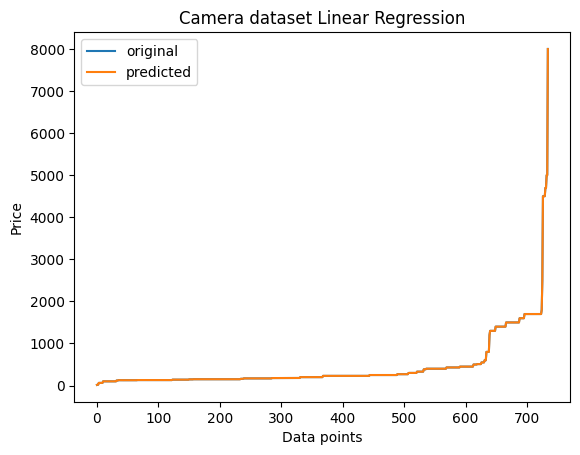

In [34]:
#Plot the graph
import matplotlib.pyplot as plt
y_pred=lr_predictions.select("prediction").collect()
y_test=lr_predictions.select("Price").collect()

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title('Camera dataset Linear Regression')
plt.xlabel('Data points')
plt.ylabel('Price')
plt.legend()
plt.show()

**Decision Tree regressor model**

In [35]:
from pyspark.ml.regression import DecisionTreeRegressor
dt=DecisionTreeRegressor(featuresCol='features',labelCol='Price')
dt_model=dt.fit(train)

In [36]:
#perform predictions
dt_predictions=dt_model.transform(train)
dt_predictions.show(5)

+-----+--------------------+----------+
|Price|            features|prediction|
+-----+--------------------+----------+
|   14|[2001.0,2032.0,10...|     83.25|
|   19|[2002.0,2268.0,11...|     83.25|
|   19|[2006.0,2640.0,17...|     83.25|
|   62|[1998.0,1280.0,64...|     83.25|
|   62|[1999.0,1280.0,64...|     83.25|
+-----+--------------------+----------+
only showing top 5 rows



In [37]:
#evaluate prediction accuracy(R2)
dt_evaluator=RegressionEvaluator(labelCol="Price",predictionCol="prediction",metricName="r2")
r2=dt_evaluator.evaluate(dt_predictions)
print(r2)


0.9984951700226803


In [38]:
#Evaluate prediction accuracy(RMSE)
dt_evaluator=RegressionEvaluator(labelCol="Price",predictionCol="prediction",metricName="rmse")
rmse=dt_evaluator.evaluate(dt_predictions)
print(rmse)



26.696369408958226


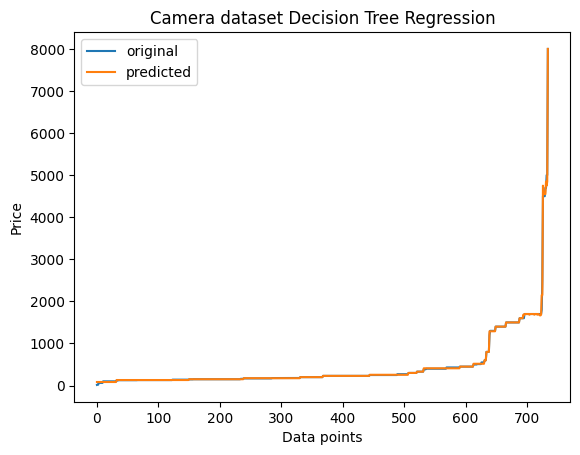

In [39]:
#Plot the graph
import matplotlib.pyplot as plt
y_pred=dt_predictions.select("prediction").collect()
y_test=dt_predictions.select("Price").collect()

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title('Camera dataset Decision Tree Regression')
plt.xlabel('Data points')
plt.ylabel('Price')
plt.legend()
plt.show()


**GBT(Gradient bosting algorithm) Regressor Algorithm**

In [40]:
from pyspark.ml.regression import GBTRegressor
gbt=GBTRegressor(featuresCol='features',labelCol='Price',maxIter=10)
gbt_model=gbt.fit(train)

In [41]:
#perform predictions
gbt_predictions=gbt_model.transform(train)
gbt_predictions.select('prediction','Price','features').show(5)


+-----------------+-----+--------------------+
|       prediction|Price|            features|
+-----------------+-----+--------------------+
|60.26562353514698|   14|[2001.0,2032.0,10...|
|41.93781669051755|   19|[2002.0,2268.0,11...|
| 47.9473606428388|   19|[2006.0,2640.0,17...|
|70.28316101875757|   62|[1998.0,1280.0,64...|
| 69.2222026228622|   62|[1999.0,1280.0,64...|
+-----------------+-----+--------------------+
only showing top 5 rows



In [42]:
#evaluate accuracy
gbt_evaluator=RegressionEvaluator(labelCol="Price",predictionCol="prediction",metricName="r2")
r2=gbt_evaluator.evaluate(gbt_predictions)
print(r2)



0.9998659498850349


In [43]:
#Evaluate prediction accuracy(RMSE)
gbt_evaluator=RegressionEvaluator(labelCol="Price",predictionCol="prediction",metricName="rmse")
rmse=gbt_evaluator.evaluate(gbt_predictions)
print(rmse)

7.967867097899778


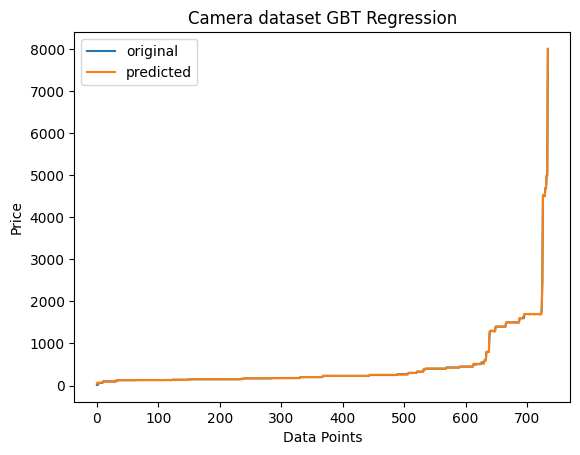

In [44]:
#Plot the graph
import matplotlib.pyplot as plt
y_pred=gbt_predictions.select("prediction").collect()
y_test=gbt_predictions.select("Price").collect()

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title('Camera dataset GBT Regression')
plt.xlabel('Data Points')
plt.ylabel('Price')
plt.legend()
plt.show()

**DataScience and Visualization**

In [45]:
!pip install chardet


In [46]:
import chardet
import pandas as pd

In [47]:
with open('/content/sample_data/camera_dataset.csv', 'rb') as f:
    encoding = chardet.detect(f.read())['encoding']

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df1 = pd.read_csv('/content/sample_data/camera_dataset.csv', encoding=encoding)
df1.nunique()

Model                 1036
Release date            14
Max resolution          98
Low resolution          70
Effective pixels        16
Zoom wide (W)           25
Zoom tele (T)          100
Normal focus range      32
Macro focus range       29
Storage included        44
Weight                 237
Dimensions             101
Price                   43
dtype: int64

In [49]:
df1.columns

Index(['Model', 'Release date', 'Max resolution', 'Low resolution',
       'Effective pixels', 'Zoom wide (W)', 'Zoom tele (T)',
       'Normal focus range', 'Macro focus range', 'Storage included',
       'Weight ', 'Dimensions', 'Price'],
      dtype='object')

In [50]:
#Calculate the correlation matrix
correlation_matrix = df1[['Release date','Max resolution','Low resolution','Effective pixels','Zoom tele (T)','Normal focus range', 'Storage included', 'Price',]].corr()

In [51]:
correlation_matrix

,Release date,Max resolution,Low resolution,Effective pixels,Zoom tele (T),Normal focus range,Storage included,Price
Release date,1.000000,0.788234,0.750016,0.790263,0.193020,-0.074887,0.213093,-0.022522
Max resolution,0.788234,1.000000,0.842790,0.953846,0.069377,-0.200449,0.166222,0.184201
Low resolution,0.750016,0.842790,1.000000,0.820322,0.154785,-0.125436,0.156652,0.154204
Effective pixels,0.790263,0.953846,0.820322,1.000000,0.084644,-0.193252,0.157844,0.190284
Zoom tele (T),0.193020,0.069377,0.154785,0.084644,1.000000,0.167641,0.114075,-0.189480
Normal focus range,-0.074887,-0.200449,-0.125436,-0.193252,0.167641,1.000000,0.159605,-0.273854
Storage included,0.213093,0.166222,0.156652,0.157844,0.114075,0.159605,1.000000,-0.103046
Price,-0.022522,0.184201,0.154204,0.190284,-0.189480,-0.273854,-0.103046,1.000000


**BAR PLOT**

<ipython-input-52-789b0fb55264>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Release date', y='Price', data=df1, palette='Set1')


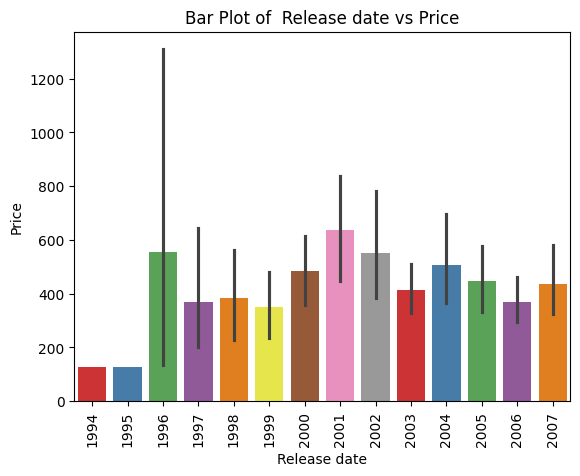

In [52]:
sns.barplot(x='Release date', y='Price', data=df1, palette='Set1')
plt.xticks(rotation=90)
plt.title('Bar Plot of  Release date vs Price')
plt.show()

In [53]:
df1=spark.read.csv('/content/sample_data/camera_dataset.csv',header=True,inferSchema=True)
df1.printSchema()


root
 |-- Model: string (nullable = true)
 |-- Release date: integer (nullable = true)
 |-- Max resolution: integer (nullable = true)
 |-- Low resolution: integer (nullable = true)
 |-- Effective pixels: integer (nullable = true)
 |-- Zoom wide (W): integer (nullable = true)
 |-- Zoom tele (T): integer (nullable = true)
 |-- Normal focus range: integer (nullable = true)
 |-- Macro focus range: integer (nullable = true)
 |-- Storage included: integer (nullable = true)
 |-- Weight : integer (nullable = true)
 |-- Dimensions: double (nullable = true)
 |-- Price: integer (nullable = true)



In [54]:
from pyspark.sql.session import SparkSession
sess=SparkSession.builder.getOrCreate()
train=sess.read.csv('/content/sample_data/camera_dataset.csv',header=True,inferSchema = True)
train.count()
train.printSchema()

df=train.toPandas()



root
 |-- Model: string (nullable = true)
 |-- Release date: integer (nullable = true)
 |-- Max resolution: integer (nullable = true)
 |-- Low resolution: integer (nullable = true)
 |-- Effective pixels: integer (nullable = true)
 |-- Zoom wide (W): integer (nullable = true)
 |-- Zoom tele (T): integer (nullable = true)
 |-- Normal focus range: integer (nullable = true)
 |-- Macro focus range: integer (nullable = true)
 |-- Storage included: integer (nullable = true)
 |-- Weight : integer (nullable = true)
 |-- Dimensions: double (nullable = true)
 |-- Price: integer (nullable = true)



**SCATTER PLOT**

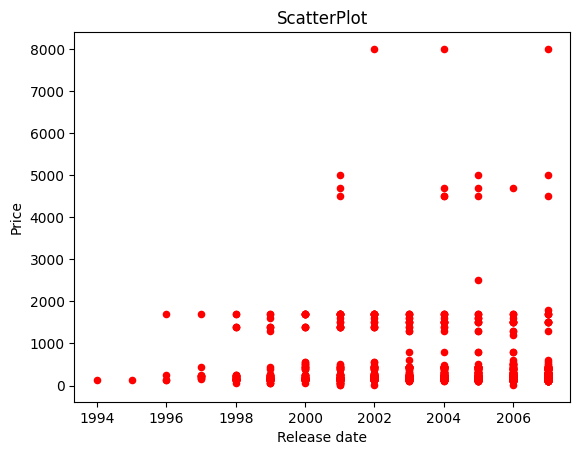

In [55]:
import matplotlib.pyplot as plt
df.plot(kind='scatter',
        x='Release date',
        y='Price',
        color='red')

# set the title
plt.title('ScatterPlot')

# show the plot
plt.show()



**LINE PLOT**

In [56]:
grp=ndf.mean()
grp.plot(kind='line', x='Release date',
        y='Price',
         label='ptratio')

# set the title
plt.title('LinePlots')

plt.legend(loc='best')
plt.show()


NameError: name 'ndf' is not defined

**BOX PLOT**

In [ ]:
df.boxplot(column=['Release date','Price'])
plt.show()

**CORRELATION HEATMAP**

In [ ]:
df_pd = df1.toPandas()

# Create a heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()